In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [ ]:
df = pd.read_csv('../../examples/EFIplus_medit.zip',compression='zip', sep=";")
df.head(5)

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(df.columns.tolist())
print('')

['Site_code', 'Latitude', 'Longitude', 'Country', 'Catchment_name', 'Galiza', 'Subsample', 'Calib_EFI_Medit', 'Calib_connect', 'Calib_hydrol', 'Calib_morphol', 'Calib_wqual', 'Geomorph1', 'Geomorph2', 'Geomorph3', 'Water_source_type', 'Flow_regime', 'Altitude', 'Geological_typology', 'Actual_river_slope', 'Natural_sediment', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul', 'Barriers_catchment_down', 'Barriers_river_segment_up', 'Barriers_river_segment_down', 'Barriers_number_river_segment_up', 'Barriers_number_river_segment_down', 'Barriers_distance_river_segment_up', 'Barriers_distance_river_segment_down', 'Impoundment', 'Hydropeaking', 'Water_abstraction', 'Hydro_mod', 'Temperature_impact', 'Velocity_increase', 'Reservoir_flushing', 'Sedimentation', 'Channelisation', 'Cross_sec', 'Instream_habitat', 'Riparian_vegetation', 'Embankment', 'Floodprotection', 'Floodplain', 'Toxic_substances', 'Acidification', 'Water_quality_index', 'Eutrophication', 'Organic_p

In [4]:
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

## 1. Run agglomerative cluster analysis using different linkage methods based on quantitative environmental variables (see previous exercise), using sites from the Douro and Tejo basins.

In [7]:
douro_tejo_df = df[df['Catchment_name'].isin(['Douro', 'Tejo'])].copy()
douro_tejo_df = douro_tejo_df.dropna()

# Select only the environmental variables
X = douro_tejo_df[continuous_vars].values

# Scale the environmental variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define linkage methods to test
linkage_methods = ['ward', 'complete', 'average', 'single']# Replace with actual column name if different

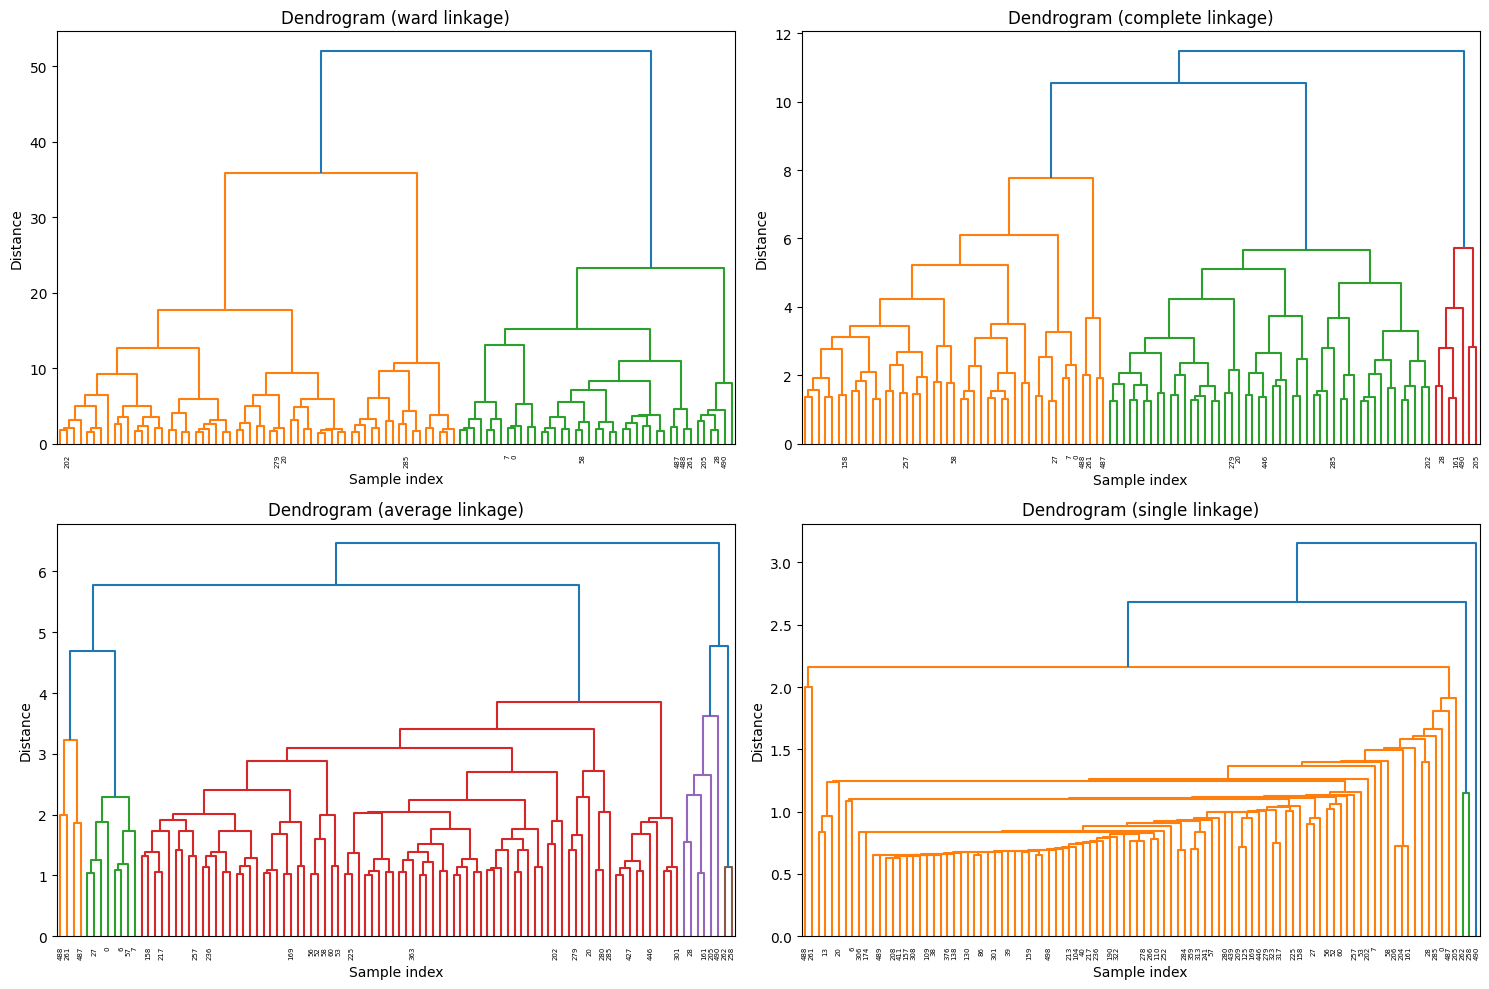

In [8]:
# Run agglomerative clustering and plot dendrograms for each linkage method
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods):
  plt.subplot(2, 2, i + 1)  # Create subplots for each dendrogram
  linked = linkage(X_scaled, method=method)
  dendrogram(linked,
             orientation='top',
             show_leaf_counts=False,
             distance_sort='descending',
             show_contracted=True,
             truncate_mode='lastp',  # show only the last p merged clusters
             p=100)  # show only the last 100 merges
  plt.title(f'Dendrogram ({method} linkage)')
  plt.xlabel('Sample index')
  plt.ylabel('Distance')

plt.tight_layout()
plt.show()

## 2. Plot a heatmap and a dendrogram by clustering the rows (sites) using average linkage

<Figure size 1200x800 with 0 Axes>

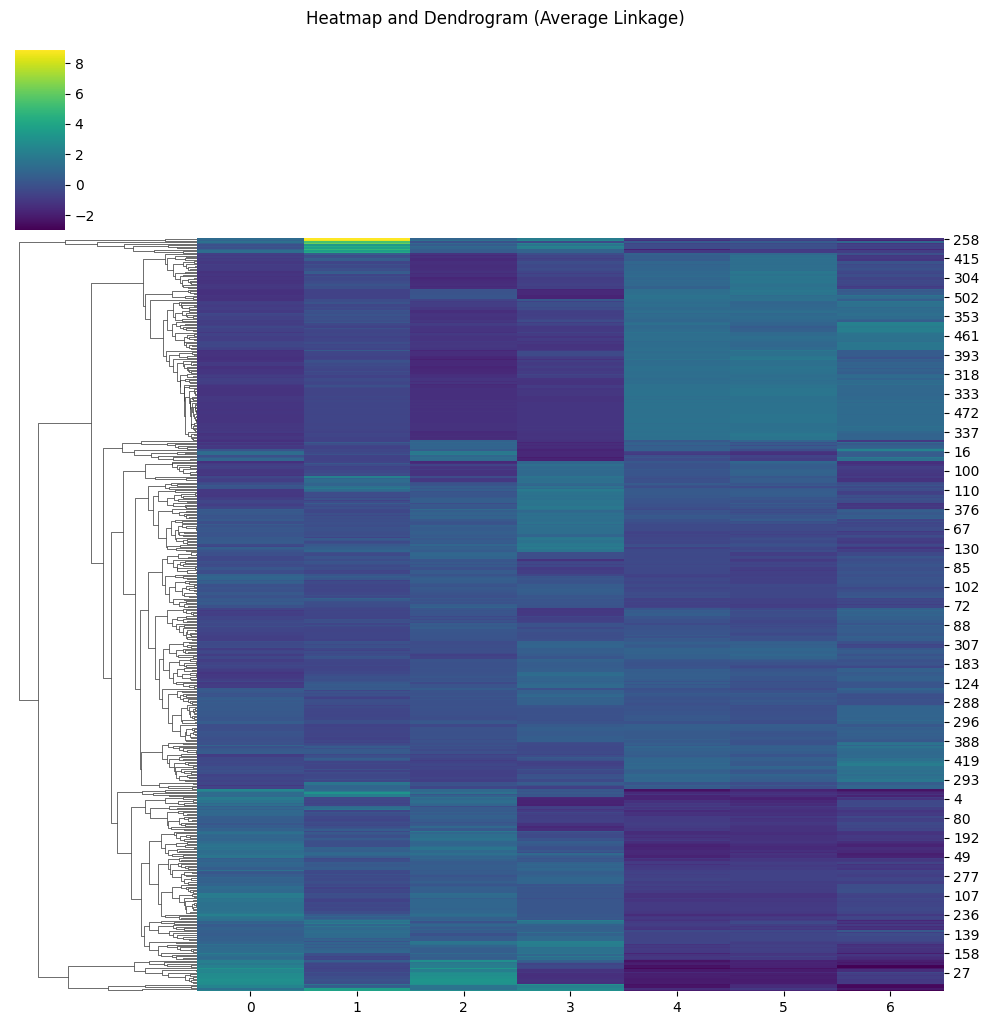

In [ ]:
# Perform average linkage clustering
linked_avg = linkage(X_scaled, method='average')

# Create the heatmap and dendrogram
plt.figure(figsize=(12, 8))
sns.clustermap(X_scaled,
               row_linkage=linked_avg,
               col_cluster=False,  # Do not cluster columns
               cmap="viridis",
               figsize=(10, 10))
plt.suptitle('Heatmap and Dendrogram (Average Linkage)', y=1.02)
plt.show()


## Plot a dendrogram that clusters the environmental variables instead (columns) using average linkage – discuss how this would help to select variables for e.g. a regression-based analysis.

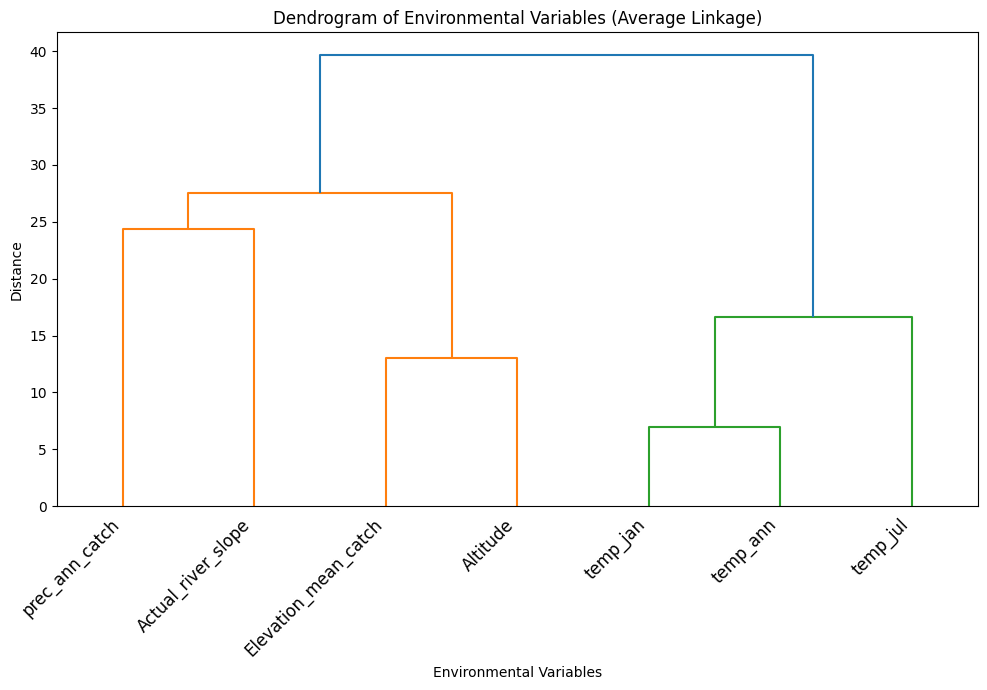

In [12]:
# Transpose the scaled data to cluster variables (columns) instead of rows
X_scaled_transposed = X_scaled.T

# Perform average linkage clustering on the transposed data
linked_vars_avg = linkage(X_scaled_transposed, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked_vars_avg,
           orientation='top',
           labels=continuous_vars, # Use variable names as labels
           show_leaf_counts=True,
           distance_sort='descending',
           show_contracted=True)
plt.title('Dendrogram of Environmental Variables (Average Linkage)')
plt.xlabel('Environmental Variables')
plt.ylabel('Distance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Clustering the envionmental variables shows us which variables are most correlated with one another. This is obvious in the dendogram, with the temperature variables grouped together. It is interesting to note that the annual temperature sits closer to the January temperature than the July temperature. As we can identify closely correlated variables, we might choose to select one from each closely related group for any further analysis with this dataset, for example only using temp_ann rather than all three temperature variables.